## Formation channels

We're given a dataset with masses of black holes from LIGO, we want to distinguish as many formation channels as possible, each of these gives rise to a different population.

The strategy here is to fit a Gaussian Mixture model: that is, **my model is a sum of $N$ gaussians** each with mean $\mu_j$ and standard deviation $\sigma_j$ and weight $\alpha_j$:
$$ p(x_i|\theta) = \sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j) $$

This depends on $3N-1$ parameters (not $3N$ because the sum of the $\alpha_j$ must be unity to ensure that this is a probability.

This is a good classification method for 1d data

In [3]:
import numpy as np
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

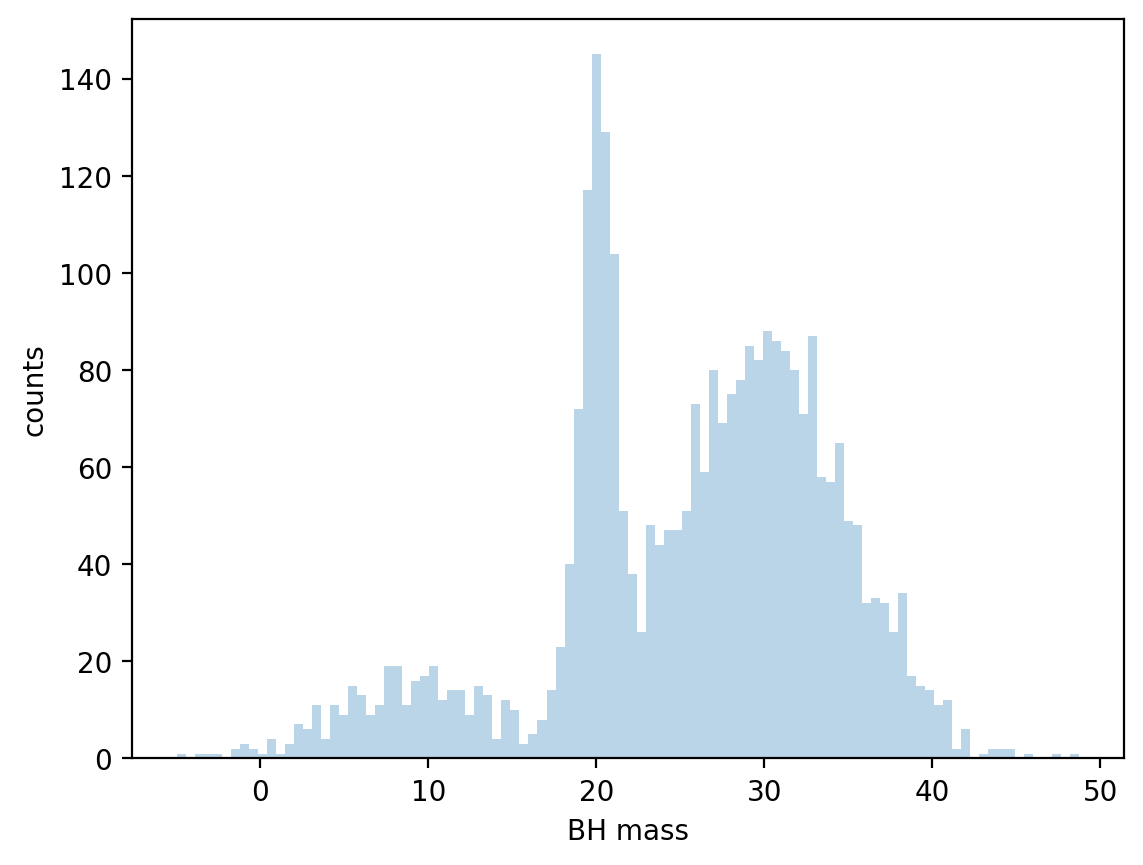

In [4]:
x = np.load("../astroML_data/formationchannels.npy")
plt.hist(x, bins = 100, alpha = .3)
plt.ylabel('counts')
plt.xlabel('BH mass');

Complete the fit 10 times with $N=1,...,10$ Gaussians. 

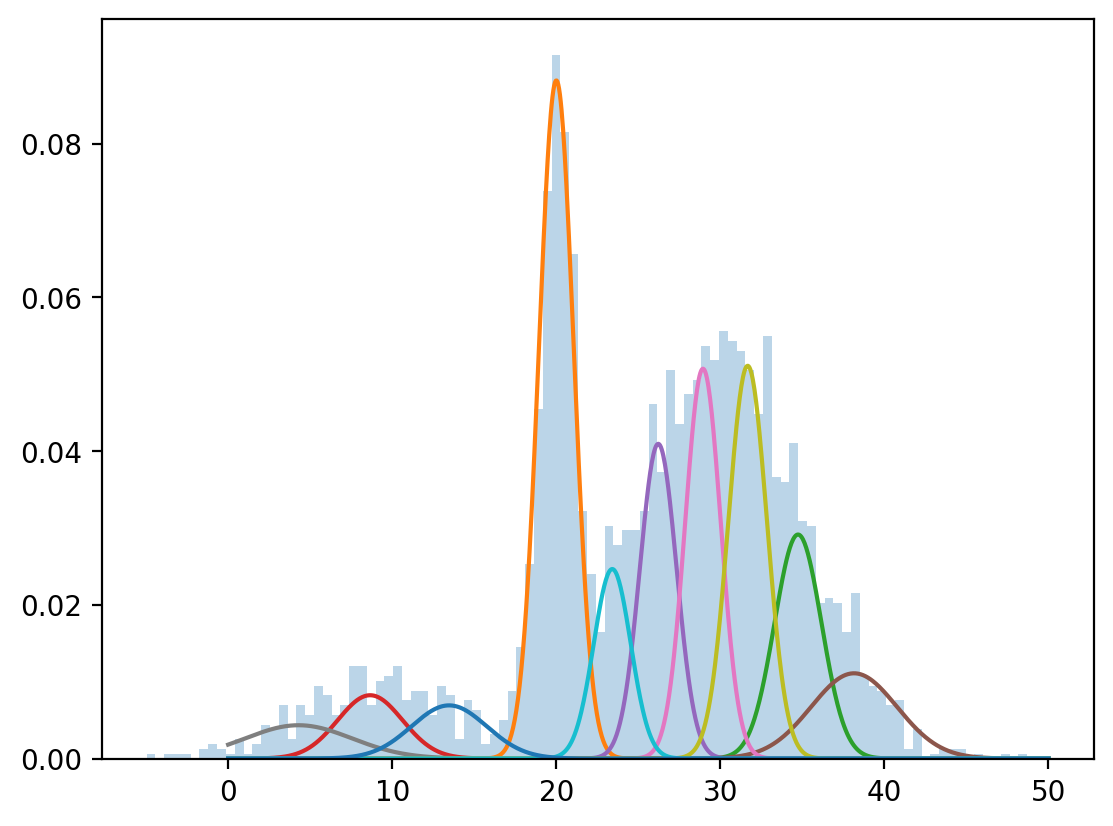

In [5]:
model = GaussianMixture(10)
model.fit(x)
plt.hist(x, bins = 100, density= True, alpha = .3)

xgrid = np.linspace(0, 50, 1000)
xgrid = xgrid[:, None]

logprob = model.score_samples(xgrid)
pdf = np.exp(logprob)[:, None]
resp = model.predict_proba(xgrid)

plt.plot(xgrid, resp*pdf);

Note: `sklearn` by default will use the so-called [Expectation-Maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm), which is one of the many great things in data science we don't have time to study in detail.

4) For each of this fits, compute the AIC (easy! It's a attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?

5) Plot the preferred solution on top of the input data. You should get a very nice fit! *The minimum of the AIC is the best model*

6) Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset. 

*Hint:* Useful methods here are `score_samples` and `predict_proba`: you'll need them both. Try to understand what they do and how you can put them together.


The best fit has 3 gaussians


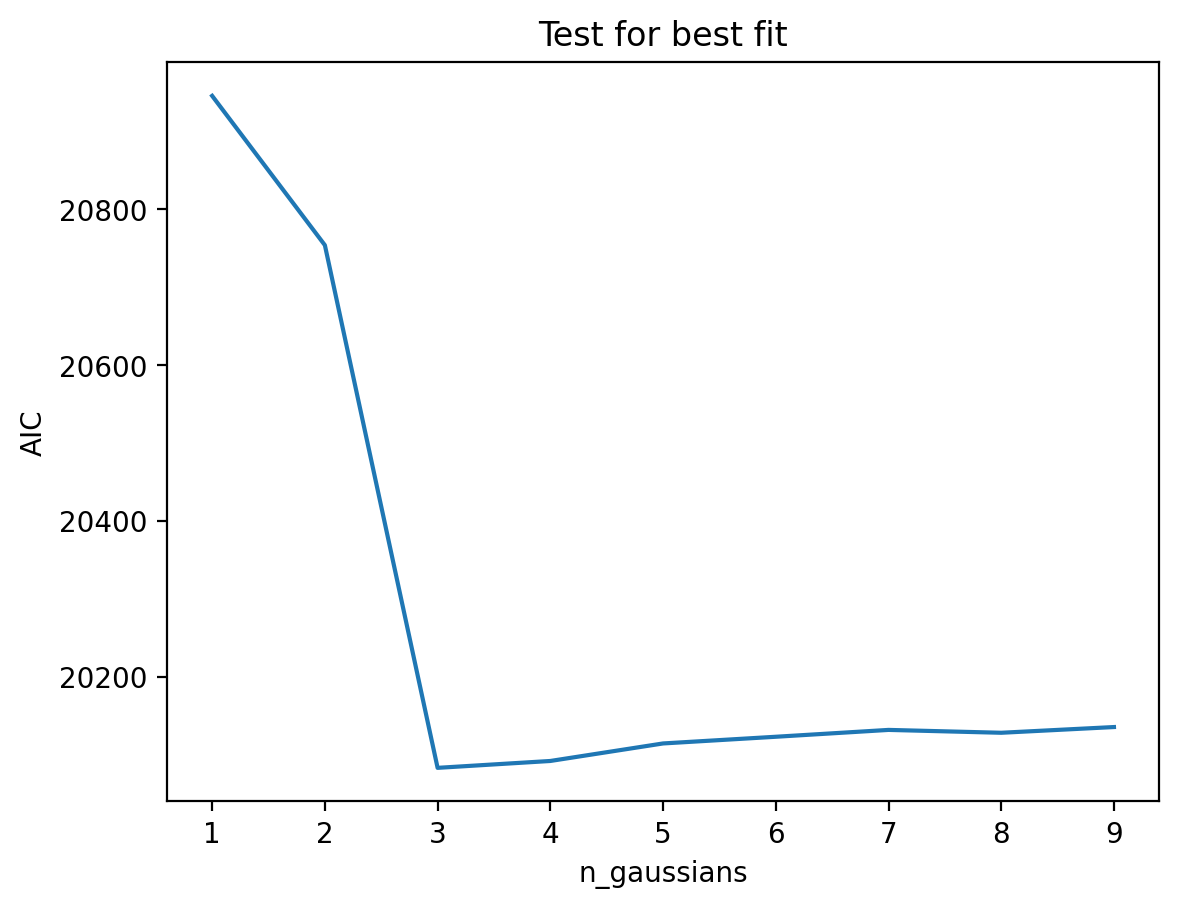

In [19]:
est_mu = np.array([])
n_fit = np.array([])
n_components = np.arange(1,10)

for n in n_components:
    model = GaussianMixture(n, random_state=0)
    model.fit(x)
    n_fit = np.append(n_fit, model.aic(x))
    est_mu = np.append(est_mu, model.means_)
    
plt.plot(n_components, n_fit);
best_fit = n_components[np.argmin(n_fit)]
print('The best fit has %.0f ' %best_fit + 'gaussians')

plt.title('Test for best fit')
plt.xlabel('n_gaussians')
plt.ylabel('AIC');
#print(est_mu)

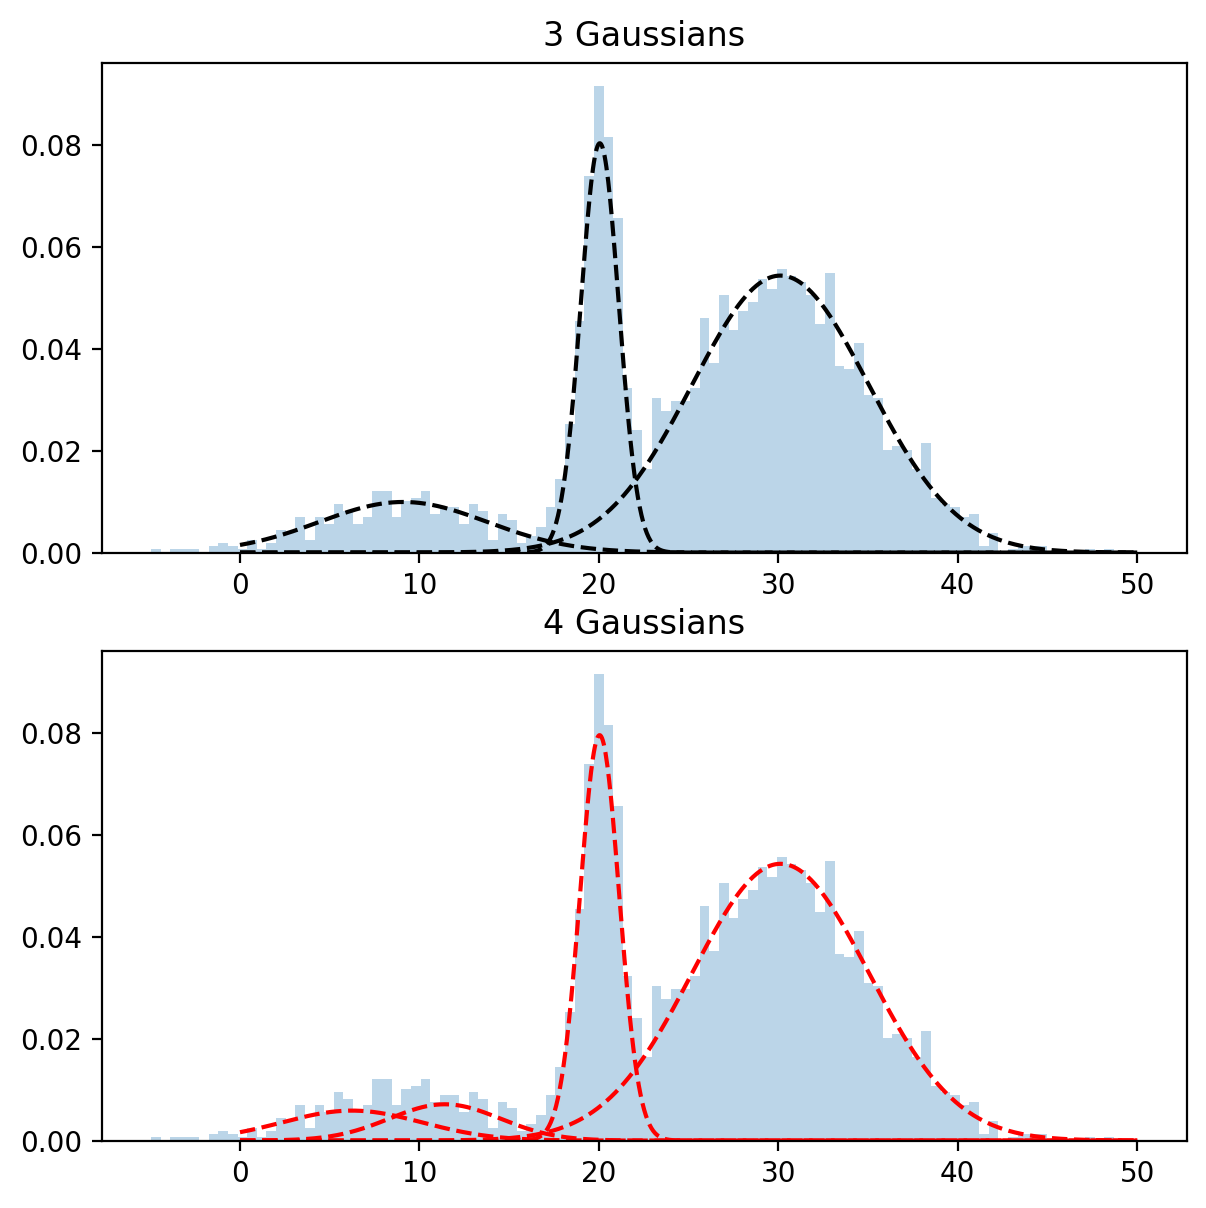

In [44]:
best_model = GaussianMixture(3, random_state=0)
best_model_1 = GaussianMixture(4, random_state=0)
best_model.fit(x)
best_model_1.fit(x)

xgrid = np.linspace(0, 50, 1000)
xgrid = xgrid[:,None]

resps = [best_model.predict_proba(xgrid), best_model_1.predict_proba(xgrid)] #responsibilities
logprobs = [best_model.score_samples(xgrid), best_model_1.score_samples(xgrid)] #probability
probs = np.exp(logprobs)

fig, axs = plt.subplots(2, figsize=(7,7))

axs[0].hist(x, bins = 100, alpha=.3, density = True)
axs[0].plot(xgrid, resps[0]*probs[0][:,None], c='k', ls='--')
axs[0].set_title('3 Gaussians')


axs[1].hist(x, bins = 100, alpha=.3, density = True)
axs[1].plot(xgrid, resps[1]*probs[1][:,None], c='r', ls='--')
axs[1].set_title('4 Gaussians');

Let's plot the single gaussian modes for the 3 gaussians case

In [47]:
print(resps[0]) #each column is a different mode

[[1.81996760e-076 2.60127899e-007 9.99999740e-001]
 [4.33837172e-076 2.71150511e-007 9.99999729e-001]
 [1.03198692e-075 2.82643333e-007 9.99999717e-001]
 ...
 [9.41384205e-169 1.00000000e+000 1.65853504e-014]
 [2.60177399e-169 1.00000000e+000 1.57358639e-014]
 [7.17549272e-170 1.00000000e+000 1.49297214e-014]]


In [52]:
print(probs[0][:,None][:15]) #this is the structure of the probs, i only print the first 15 entries

[[0.00149256]
 [0.00152393]
 [0.00155577]
 [0.00158809]
 [0.0016209 ]
 [0.0016542 ]
 [0.00168799]
 [0.00172227]
 [0.00175704]
 [0.00179231]
 [0.00182808]
 [0.00186435]
 [0.00190112]
 [0.0019384 ]
 [0.00197618]]


In [55]:
res=resps[0]*probs[0][:,None]
print(res[:15]) #i multiply each mode, so each responsibility, for the probability values of my xgrid array

[[2.71641987e-79 3.88257788e-10 1.49256457e-03]
 [6.61135482e-79 4.13213148e-10 1.52392498e-03]
 [1.60553041e-78 4.39726956e-10 1.55576580e-03]
 [3.89028221e-78 4.67893539e-10 1.58808971e-03]
 [9.40541976e-78 4.97812741e-10 1.62089924e-03]
 [2.26887077e-77 5.29590236e-10 1.65419681e-03]
 [5.46104607e-77 5.63337849e-10 1.68798475e-03]
 [1.31152455e-76 5.99173910e-10 1.72226523e-03]
 [3.14276212e-76 6.37223611e-10 1.75704030e-03]
 [7.51417142e-76 6.77619390e-10 1.79231191e-03]
 [1.79260742e-75 7.20501338e-10 1.82808184e-03]
 [4.26701120e-75 7.66017620e-10 1.86435174e-03]
 [1.01343729e-74 8.14324926e-10 1.90112314e-03]
 [2.40162104e-74 8.65588940e-10 1.93839740e-03]
 [5.67866934e-74 9.19984838e-10 1.97617575e-03]]


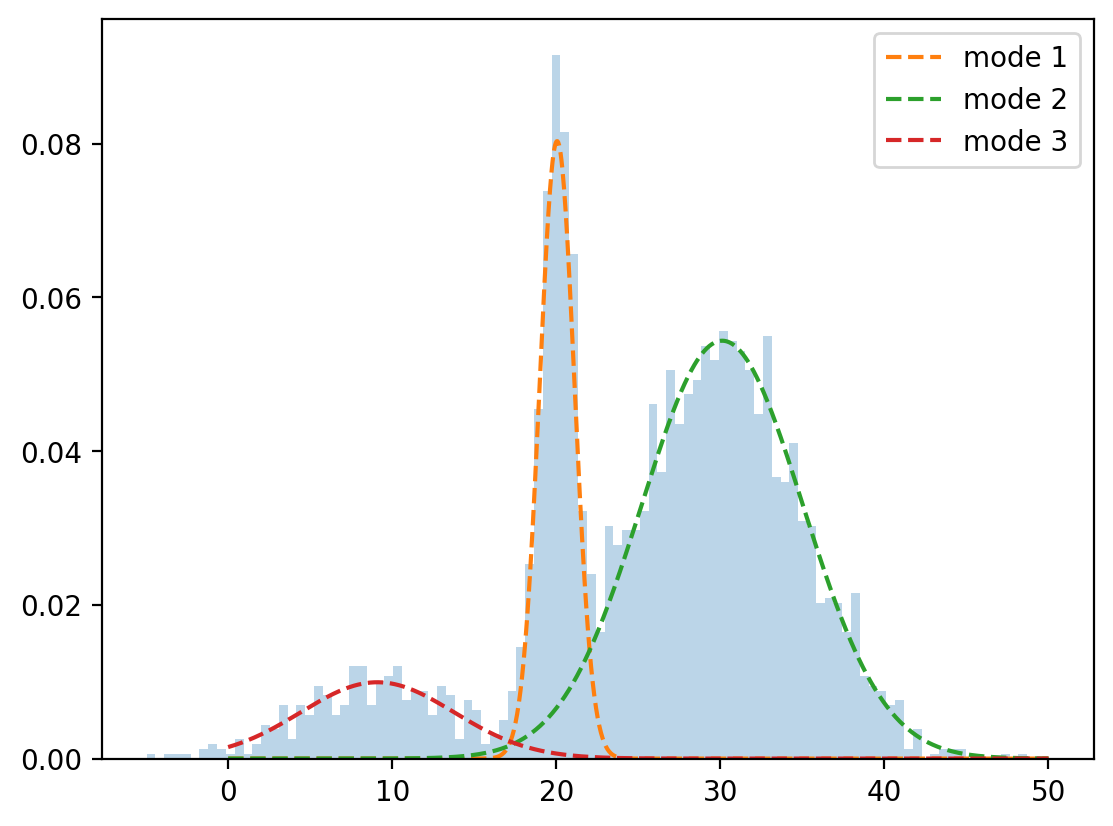

In [62]:
res = resps[0]*probs[0][:,None]


plt.hist(x, bins = 100, alpha=.3, density = True)
for mode in range(3):
    plt.plot(xgrid, res[:,mode], ls='--', label = f'mode {mode+1}')

plt.legend();

Notice that my responsibilities matrix is ordered from most important gaussian mode to least important (probability-wise)

### Adding KDE

In [73]:
from sklearn.neighbors import KernelDensity

kde_skl = KernelDensity(bandwidth = 1.0, kernel='linear')
kde_skl.fit(x)

KernelDensity(kernel='linear')

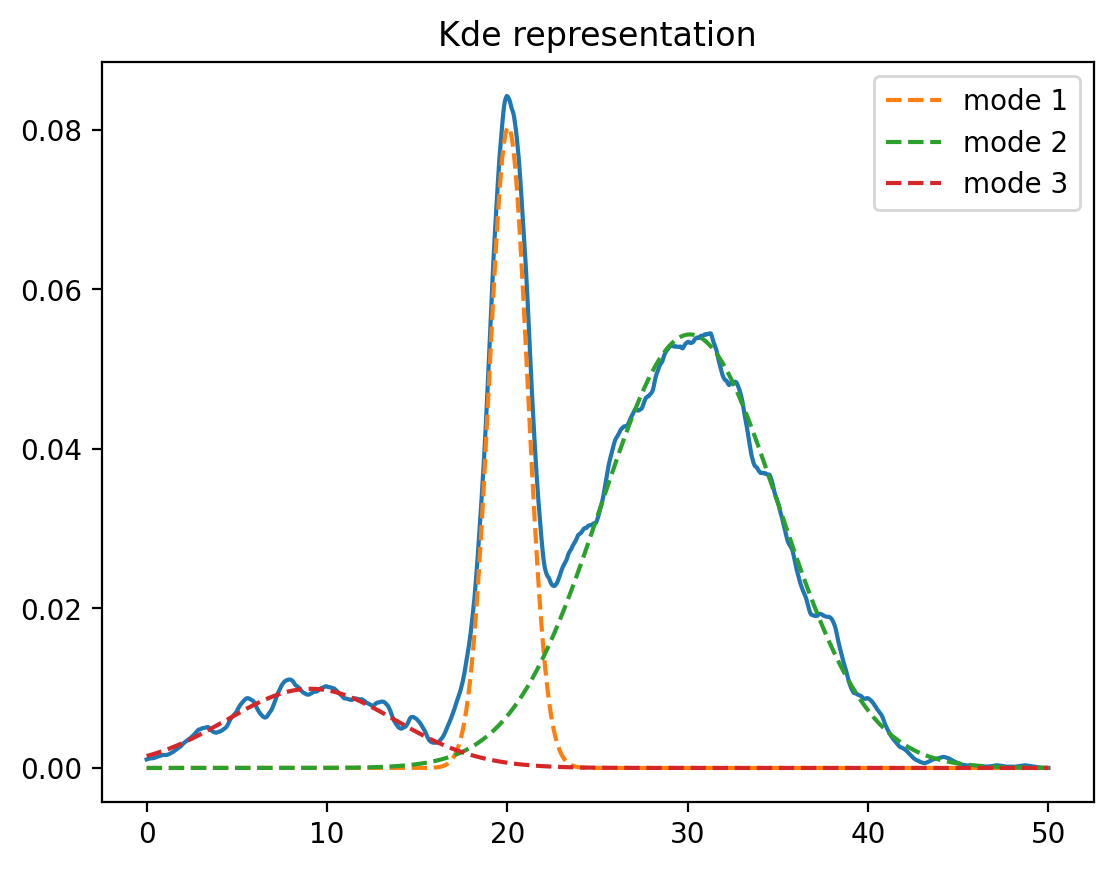

In [76]:
log_pdf = kde_skl.score_samples(xgrid) # sklearn returns log(density)
pdf = np.exp(log_pdf)

plt.plot(xgrid,pdf)

for mode in range(3):
    plt.plot(xgrid, res[:,mode], ls='--', label = f'mode {mode+1}')

plt.title('Kde representation')
plt.legend();